In [5]:
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected =  True)
visits_duration_bycounty_2019 = pd.read_excel('visits_duration_bycounty_2019.xlsx')

In [6]:
#%pwd

In [7]:
#%ls

In [8]:
visits_duration_bycounty_2019.head()

,naics_2,countyfips,total_visits,est_total_dwell,avg_median_dwell,business_type,state,statefips,countyname,cbgfips,average_dwell,visits_per_week
0,6.0,9009.0,1956,217709.5,74.375000,Other,CT,9.0,New Haven County,9.009176e+10,111.303429,37.615383
1,6.0,NaN,2091,190731.5,41.125000,Other,NaN,NaN,NaN,NaN,91.215446,40.211540
2,11.0,9001.0,24,2459.5,97.687500,"Agriculture, Forestry, Fishing and Hunting",CT,9.0,Fairfield County,9.001240e+10,102.479164,0.461538
3,11.0,9003.0,61,7532.0,109.272728,"Agriculture, Forestry, Fishing and Hunting",CT,9.0,Hartford County,9.003410e+10,123.475410,1.173077
4,11.0,9005.0,138,6885.5,108.875000,"Agriculture, Forestry, Fishing and Hunting",CT,9.0,Litchfield County,9.005306e+10,49.894928,2.653846


In [9]:
visits_duration_bycounty_2019.columns

Index(['naics_2', 'countyfips', 'total_visits', 'est_total_dwell',
       'avg_median_dwell', 'business_type', 'state', 'statefips', 'countyname',
       'cbgfips', 'average_dwell', 'visits_per_week'],
      dtype='object')

In [10]:
# Création d'une fonction permettant de calculer le total de valeurs manquantes, le pourcentage et le type de 
 ## chaque colonne 
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [11]:
missing_data(visits_duration_bycounty_2019)

,naics_2,countyfips,total_visits,est_total_dwell,avg_median_dwell,business_type,state,statefips,countyname,cbgfips,average_dwell,visits_per_week
Total,14,20,0,0,0,0,20,20,20,22,0,0
Percent,4.375,6.25,0,0,0,0,6.25,6.25,6.25,6.875,0,0
Types,float64,float64,int64,float64,float64,object,object,float64,object,float64,float64,float64


In [12]:
visits_duration_bycounty_2019.shape

(320, 12)

In [13]:
visits_duration_bycounty_2019.describe()

,naics_2,countyfips,total_visits,est_total_dwell,avg_median_dwell,statefips,cbgfips,average_dwell,visits_per_week
count,306.000000,300.000000,3.200000e+02,3.200000e+02,320.000000,300.000000,2.980000e+02,320.000000,320.000000
mean,51.019608,22344.720000,4.544569e+05,3.775661e+07,80.919166,22.336667,2.219966e+11,94.062773,8739.555894
std,18.827420,16786.274468,1.080455e+06,8.832999e+07,49.511580,16.786780,1.674778e+11,25.172736,20777.989861
min,6.000000,9001.000000,2.000000e+01,1.060500e+03,14.333333,9.000000,9.001011e+10,25.782179,0.384615
25%,42.000000,9007.000000,4.923250e+03,5.079824e+05,54.853633,9.000000,9.007560e+10,76.229177,94.677885
50%,51.000000,9013.000000,2.751350e+04,2.622380e+06,74.794678,9.000000,9.013538e+10,95.743324,529.105774
75%,62.000000,44003.000000,3.167735e+05,2.689645e+07,97.934649,44.000000,4.400302e+11,111.055693,6091.798096
max,92.000000,44009.000000,6.598643e+06,5.145943e+08,712.666687,44.000000,4.400905e+11,212.359375,126896.984375


In [14]:
visits_duration_bycounty_2019.columns

Index(['naics_2', 'countyfips', 'total_visits', 'est_total_dwell',
       'avg_median_dwell', 'business_type', 'state', 'statefips', 'countyname',
       'cbgfips', 'average_dwell', 'visits_per_week'],
      dtype='object')

In [15]:
visits_duration_bycounty_2019.dtypes

naics_2             float64
countyfips          float64
total_visits          int64
est_total_dwell     float64
avg_median_dwell    float64
business_type        object
state                object
statefips           float64
countyname           object
cbgfips             float64
average_dwell       float64
visits_per_week     float64
dtype: object

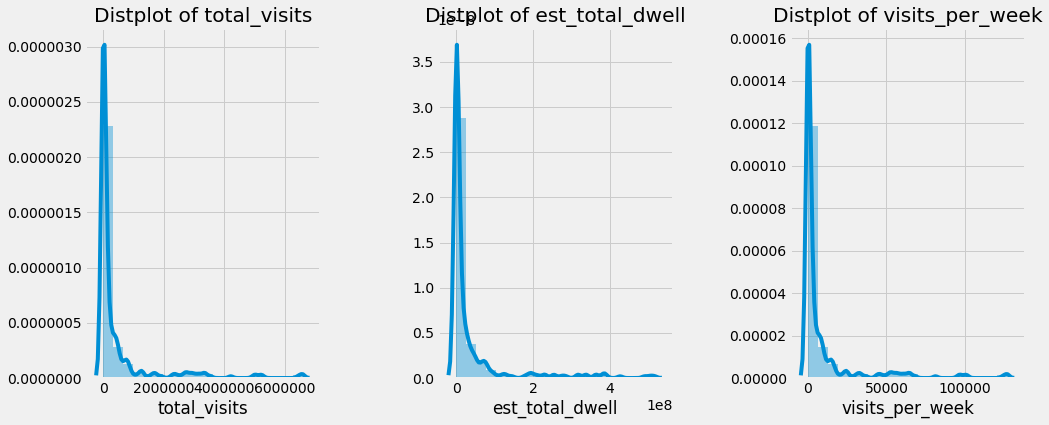

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['total_visits', 'est_total_dwell', 'visits_per_week']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(visits_duration_bycounty_2019[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

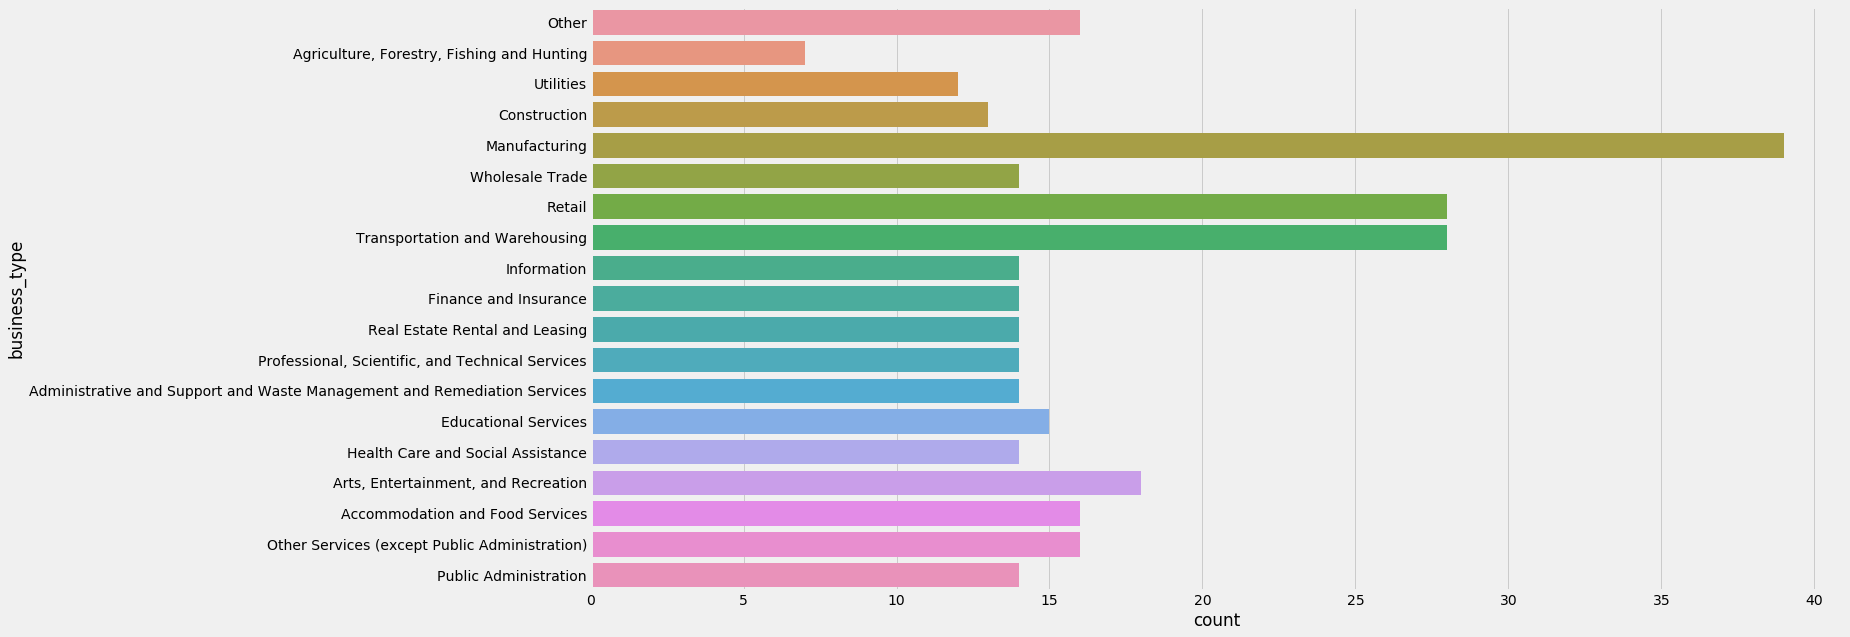

In [17]:
plt.figure(1 , figsize = (20 , 10))
sns.countplot(y = 'business_type' , data = visits_duration_bycounty_2019)
plt.show()

In [18]:
visits_duration_bycounty_2019.business_type.unique()

array(['Other', 'Agriculture, Forestry, Fishing and Hunting', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)',
       'Public Administration'], dtype=object)

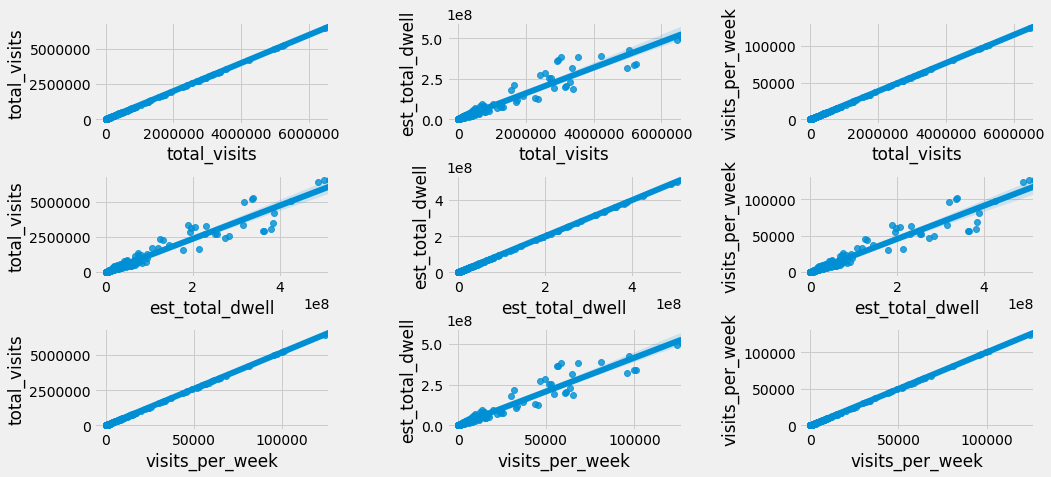

In [19]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['total_visits', 'est_total_dwell', 'visits_per_week']:
    for y in ['total_visits', 'est_total_dwell', 'visits_per_week']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = visits_duration_bycounty_2019)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

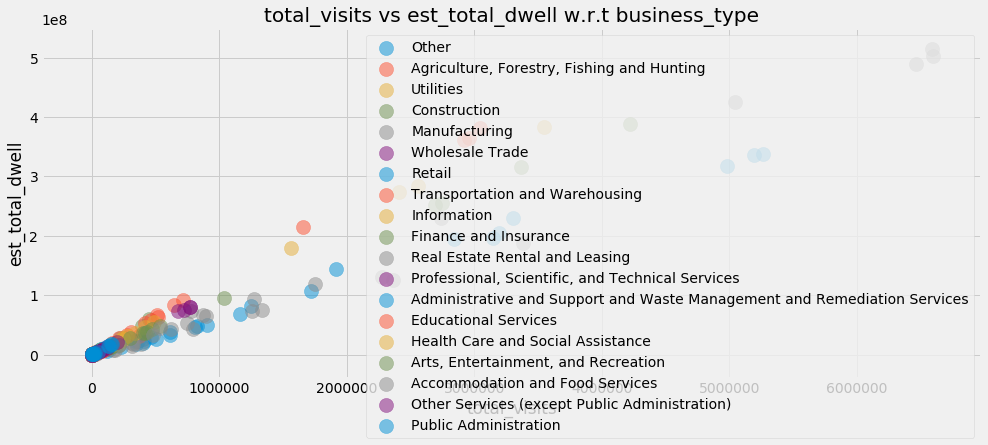

In [20]:
plt.figure(1 , figsize = (15 , 6))
for business_type in ['Other', 'Agriculture, Forestry, Fishing and Hunting', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)',
       'Public Administration']:
    plt.scatter(x = 'total_visits' , y = 'est_total_dwell' , data = visits_duration_bycounty_2019[visits_duration_bycounty_2019['business_type'] == business_type] ,
                s = 200 , alpha = 0.5 , label = business_type)
plt.xlabel('total_visits'), plt.ylabel('est_total_dwell') 
plt.title('total_visits vs est_total_dwell w.r.t business_type')
plt.legend()
plt.show()

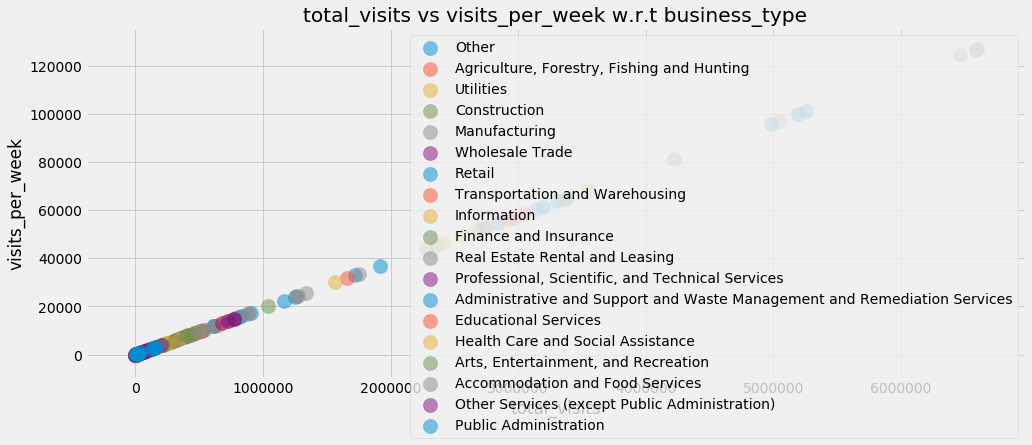

In [21]:
plt.figure(1 , figsize = (15 , 6))
for business_type in ['Other', 'Agriculture, Forestry, Fishing and Hunting', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)',
       'Public Administration']:
    plt.scatter(x = 'total_visits' , y = 'visits_per_week' , data = visits_duration_bycounty_2019[visits_duration_bycounty_2019['business_type'] == business_type] ,
                s = 200 , alpha = 0.5 , label = business_type)
plt.xlabel('total_visits'), plt.ylabel('visits_per_week') 
plt.title('total_visits vs visits_per_week w.r.t business_type')
plt.legend()
plt.show()

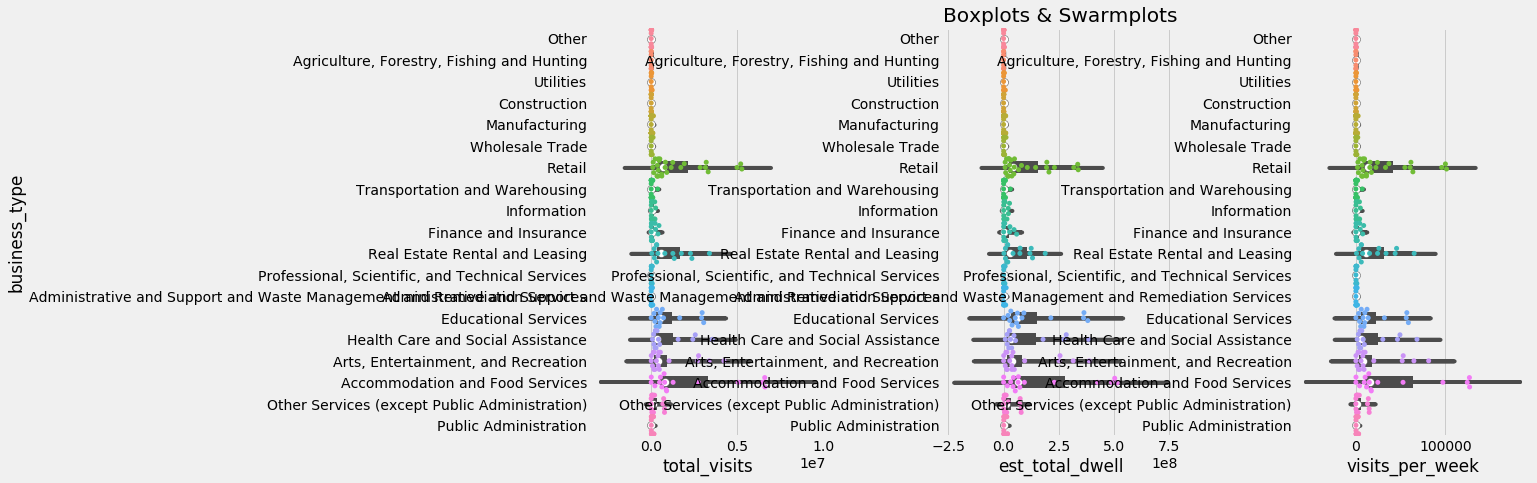

In [22]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['total_visits', 'est_total_dwell', 'visits_per_week']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'business_type' , data = visits_duration_bycounty_2019 , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'business_type' , data = visits_duration_bycounty_2019)
    plt.ylabel('business_type' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### Clustering using K- means

1.Segmentation using Age and Spending Score

In [23]:
'''total_visits and est_total_dwell'''
X1 = visits_duration_bycounty_2019[['total_visits' , 'est_total_dwell']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

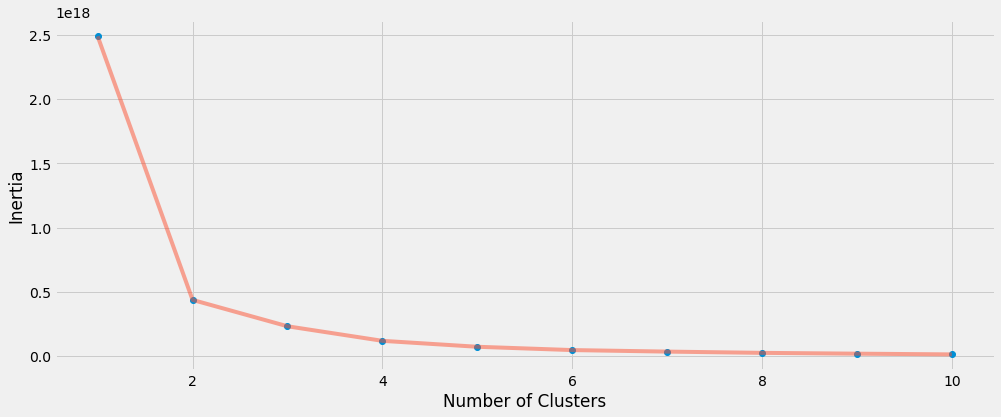

In [24]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [25]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [26]:
centroids1

array([[7.31399767e+04, 6.16728777e+06],
       [4.63047346e+06, 3.93754091e+08],
       [2.68616767e+06, 2.25126940e+08],
       [9.22322405e+05, 7.21791503e+07]])

2. Segmentation using 'total_visits', 'est_total_dwell', 'visits_per_week'

In [27]:
'total_visits', 'est_total_dwell', 'visits_per_week'
X2 = visits_duration_bycounty_2019[['total_visits', 'est_total_dwell', 'visits_per_week']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

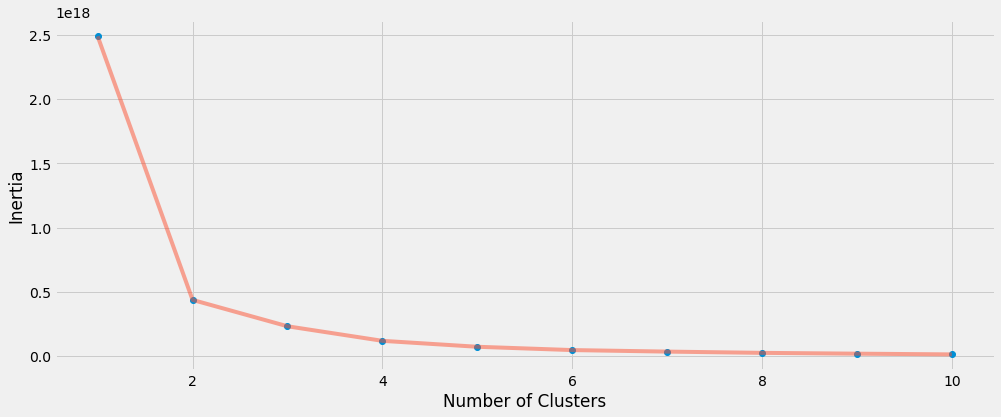

In [28]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [29]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

3.Segmentation using 'naics_2', 'countyfips', 'total_visits', 'est_total_dwell','avg_median_dwell', 'statefips', 
'cbgfips', 'average_dwell', 'visits_per_week

In [30]:
'naics_2', 'countyfips', 'total_visits', 'est_total_dwell','avg_median_dwell', 'statefips',
'cbgfips', 'average_dwell', 'visits_per_week'
X3 = visits_duration_bycounty_2019[['naics_2', 'countyfips', 'total_visits', 'est_total_dwell','avg_median_dwell', 'statefips', 
'cbgfips', 'average_dwell', 'visits_per_week']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

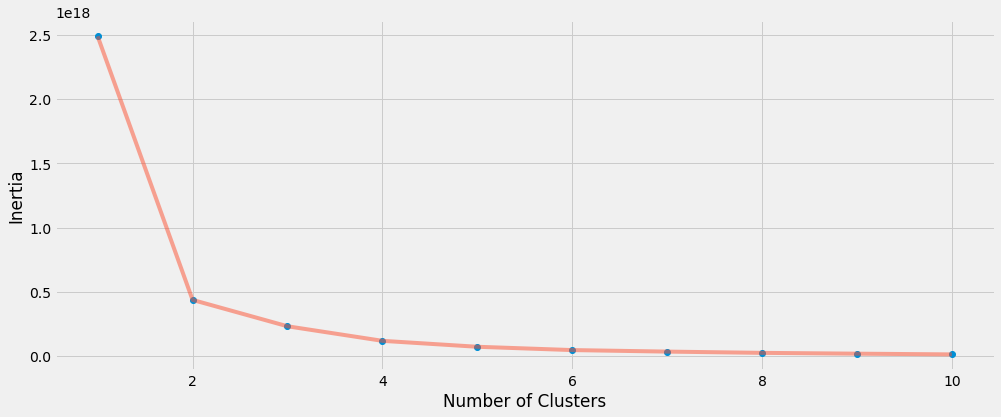

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()